<h2 align=center> Principal Component Analysis</h2>

### Task 2: Load the Data and Libraries
---

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (12,8)

In [4]:
# data URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data

# Load Data

In [9]:
iris = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data",
                 header = None)
iris.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
iris.columns=['sepal_length','sepal_width','petal_length','petal_width','species']

In [11]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [12]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Task 3: Visualize the Data
---

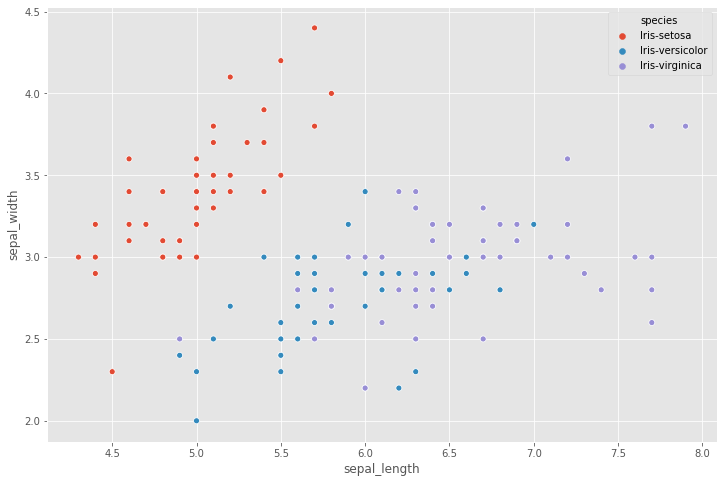

In [13]:
sns.scatterplot(x='sepal_length',y='sepal_width',data=iris,hue=iris.species)

### Task 4: Standardize the Data
---

In [15]:
from sklearn.preprocessing import StandardScaler
X=iris.iloc[:,:4].values
y=iris.species.values

In [16]:
X.shape

(150, 4)

In [17]:
y.shape

(150,)

In [19]:
X=StandardScaler().fit_transform(X)

### Task 5: Compute the Eigenvectors and Eigenvalues
---

Covariance: $\sigma_{jk} = \frac{1}{n-1}\sum_{i=1}^{N}(x_{ij}-\bar{x_j})(x_{ik}-\bar{x_k})$

Coviance matrix: $Σ = \frac{1}{n-1}((X-\bar{x})^T(X-\bar{x}))$

In [20]:
cov_matrix=np.cov(X.T)
print("Covariance matrix:\n",cov_matrix)

Covariance matrix:
 [[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


In [22]:
eigen_val,eigen_vec=np.linalg.eig(cov_matrix)

In [25]:
print('eigen values:\n',eigen_val,'\n\n eigen_vectors:\n',eigen_vec)

eigen values:
 [2.93035378 0.92740362 0.14834223 0.02074601] 

 eigen_vectors:
 [[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]


We can prove this by looking at the covariance matrix. It has the property that it is symmetric. We also constrain the each of the columns (eigenvectors) such that the values sum to one. Thus, they are orthonormal to each other.

Eigendecomposition of the covriance matrix:  $Σ = W\wedge W^{-1}$

### Task 6: Singular Value Decomposition (SVD)
---

In [26]:
eigen_vect_svd=np.linalg.svd(cov_matrix)
eigen_vect_svd

(array([[-0.52237162, -0.37231836,  0.72101681,  0.26199559],
        [ 0.26335492, -0.92555649, -0.24203288, -0.12413481],
        [-0.58125401, -0.02109478, -0.14089226, -0.80115427],
        [-0.56561105, -0.06541577, -0.6338014 ,  0.52354627]]),
 array([2.93035378, 0.92740362, 0.14834223, 0.02074601]),
 array([[-0.52237162,  0.26335492, -0.58125401, -0.56561105],
        [-0.37231836, -0.92555649, -0.02109478, -0.06541577],
        [ 0.72101681, -0.24203288, -0.14089226, -0.6338014 ],
        [ 0.26199559, -0.12413481, -0.80115427,  0.52354627]]))

In [28]:
_,singuar_values,_=np.linalg.svd(cov_matrix)
singuar_values

array([2.93035378, 0.92740362, 0.14834223, 0.02074601])

### Task 7: Picking Principal Components Using the Explained Variance
---

In [29]:
variance_explained=[(i/(np.sum(singuar_values)) * 100) for i in singuar_values]
variance_explained

[72.77045209380134, 23.030523267680643, 3.68383195762739, 0.515192680890626]

In [33]:
cum_var_explained=np.cumsum(variance_explained)
cum_var_explained

array([ 72.77045209,  95.80097536,  99.48480732, 100.        ])

Text(0.5, 1.0, 'principal component analysis by SVD')

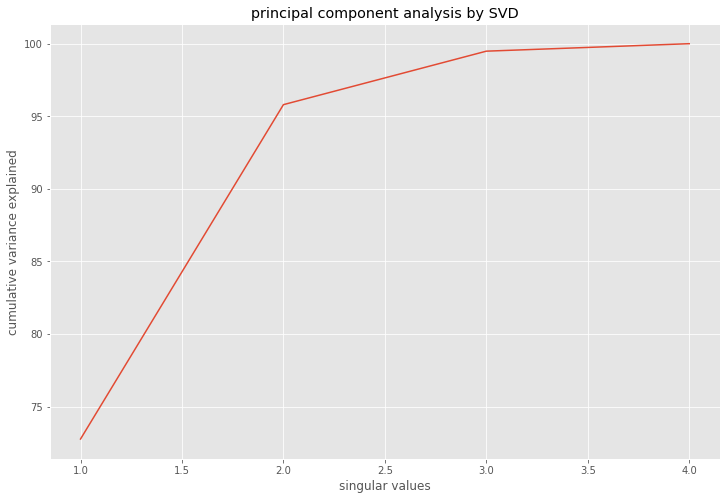

In [34]:
sns.lineplot(x=[1,2,3,4],y=cum_var_explained)
plt.ylabel("cumulative variance explained")
plt.xlabel("singular values")
plt.title('principal component analysis by SVD')

### Task 8: Project Data Onto Lower-Dimensional Linear Subspace
---

In [37]:
projection_matrix=(eigen_vec.T[:][:])[:2].T

In [38]:
print(projection_matrix)

[[ 0.52237162 -0.37231836]
 [-0.26335492 -0.92555649]
 [ 0.58125401 -0.02109478]
 [ 0.56561105 -0.06541577]]


In [39]:
#same
eigen_vec[:,:2]

array([[ 0.52237162, -0.37231836],
       [-0.26335492, -0.92555649],
       [ 0.58125401, -0.02109478],
       [ 0.56561105, -0.06541577]])

In [40]:
X_pca=X.dot(projection_matrix)

In [41]:
X_pca.shape

(150, 2)

In [42]:
iris.species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

Text(0.5, 1.0, 'PCA')

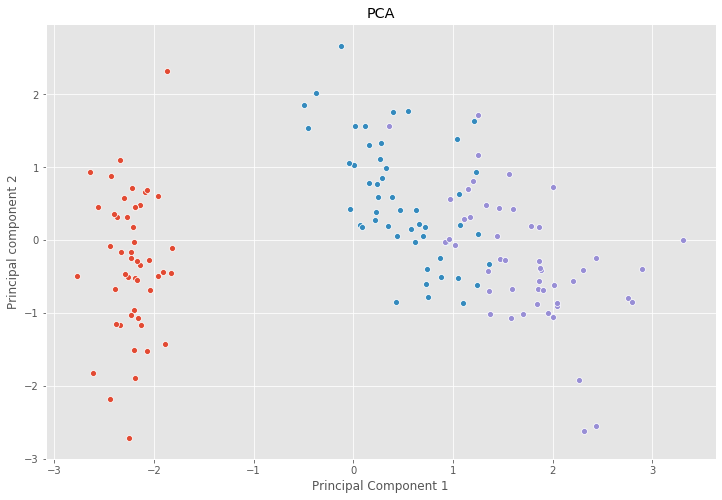

In [45]:
for i in ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']:
    sns.scatterplot(x=X_pca[iris.species==i,0],y=X_pca[iris.species==i,1])
    
plt.xlabel('Principal Component 1')
plt.ylabel('Principal component 2')
plt.title('PCA')